In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [13]:
df_user = pd.read_csv('takehome_users.csv', encoding='ANSI')
df_eng = pd.read_csv('takehome_user_engagement.csv' )

In [14]:
df_eng['time_stamp'] = pd.to_datetime(df_eng['time_stamp'])

In [15]:
for useridx in df_user['object_id'].index: 
    user = df_user['object_id'][useridx]    
    df_temp = df_eng[df_eng['user_id']== user]
    if not df_temp.empty:
        for ind in df_temp.index:
            row= df_temp['time_stamp'][ind]
            plus7 = df_temp['time_stamp'][ind] + timedelta(days=7)
            counts = len(df_temp[(df_temp['time_stamp']>row) & (df_temp['time_stamp']<plus7)])
            df_temp.loc[ind,'visit_count'] = counts
        if (df_temp['visit_count'].max()) > 2:            
            df_user.loc[useridx, 'active'] = 1
        else:
            df_user.loc[useridx, 'active'] = 0
        

In [23]:
df_user['active'].isnull().sum()

3177

#### There are 3177 users who just signed up and did not use the service

In [41]:
(df_user['active'].value_counts()/df_user.shape[0])*100

0.0    89.191667
1.0    10.808333
Name: active, dtype: float64

#### Highly skewed. Very small % of active users

In [25]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  active                      8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [22]:
df_user['invited_by_user_id'].isnull().sum()

5583

In [28]:
#We can mark them as inactive
df_user['active'] =df_user['active'].fillna(0)

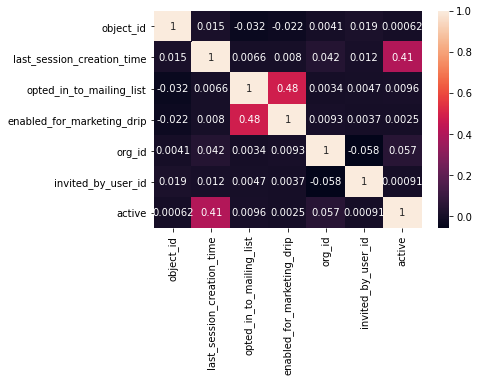

In [32]:
sns.heatmap(df_user.corr(), annot=True)

#### Not much correlation beween variables. 

In [35]:
df_user.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [36]:
df_user.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'active'],
      dtype='object')

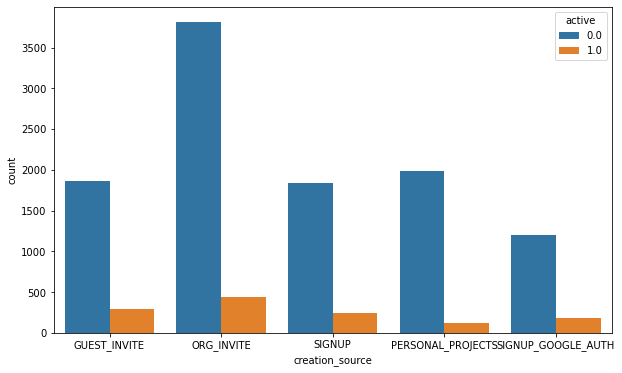

In [38]:
plt.figure(figsize=(10,6))
sns.countplot('creation_source', hue='active', data=df_user)

#### More users were invited by organizations as a full member. Useful for marketing.


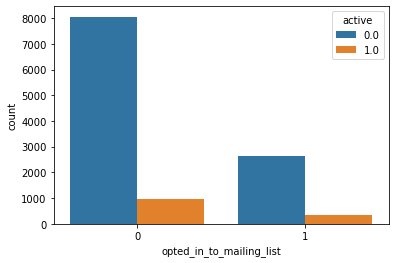

In [40]:
sns.countplot('opted_in_to_mailing_list', hue='active', data=df_user)